# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
import json

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key
#
# # Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/siyuanliang/BootCamp_University/Python-api-challenge/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


589

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
cities
# set a empty list
List = [[],[],[],[],[],[],[],[],[],[]]
i = 1
for city in cities:

    url = ("https://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid="+ weather_api_key+"&units=imperial")
    response = requests.get(url).json()
    print(response)
    print(city)


    if response["cod"] == '404': #could also check == requests.codes.ok
        continue

    # put the information into List
    List[6].append(i)
    i+=1

    temperature = response["main"]["temp_max"]
    List[0].append(temperature)
    latitude = response["coord"]["lat"]
    List[1].append(latitude)
    longitude = response["coord"]["lon"]
    List[7].append(longitude)
    Humidity = response['main']['humidity']
    List[2].append(Humidity)
    Cloudiness = response['clouds']['all']
    List[3].append(Cloudiness)
    WindSpeed = response['wind']['speed']
    List[4].append(WindSpeed)
    List[5].append(city)
    Country = response['sys']['country']
    List[8].append(Country)
    Date = response['dt']
    List[9].append(Date)


{'coord': {'lon': 121.942, 'lat': 7.208}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.57, 'feels_like': 79.57, 'temp_min': 79.57, 'temp_max': 79.57, 'pressure': 1009, 'humidity': 84, 'sea_level': 1009, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 3.29, 'deg': 285, 'gust': 5.44}, 'clouds': {'all': 97}, 'dt': 1665498930, 'sys': {'country': 'PH', 'sunrise': 1665437944, 'sunset': 1665481129}, 'timezone': 28800, 'id': 1702944, 'name': 'Malayal', 'cod': 200}
malayal
{'coord': {'lon': -124.1573, 'lat': 40.5982}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 50.34, 'feels_like': 49.21, 'temp_min': 49.12, 'temp_max': 52.66, 'pressure': 1016, 'humidity': 88}, 'visibility': 402, 'wind': {'speed': 4.61, 'deg': 140}, 'clouds': {'all': 100}, 'dt': 1665498931, 'sys': {'type': 1, 'id': 4127, 'country': 'US', 'sunrise

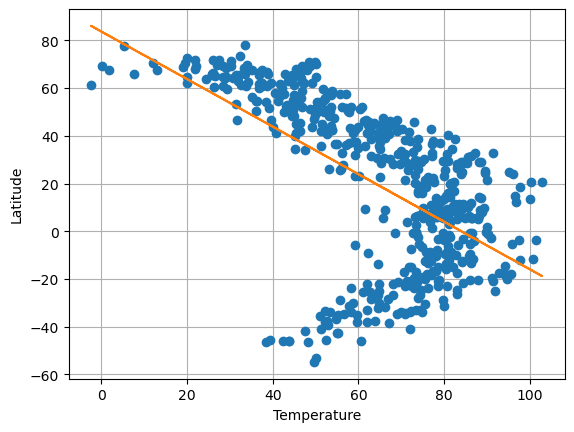

In [30]:
# A series of scatter plots to showcase
# Temperature (F) vs. Latitude

#obtain m (slope) and b(intercept) of linear regression line
m = np.polyfit(List[0],List[1],1)
f = np.poly1d(m)
plt.plot(List[0],List[1],"o", List[0], f(List[0]))
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.grid()

plt.show()
# At the start of the latitude, temperature was lowest, and following that increasing latitude, the temperature
# become higher, but when latitude pass 0, the more latitude is reducing, the temperature is lower again.
#



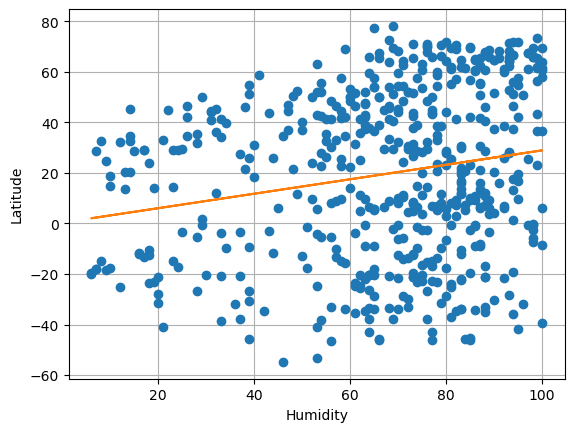

In [31]:
# Humidity (%) vs. Latitude
m = np.polyfit(List[2],List[1],1)
f = np.poly1d(m)
plt.plot(List[2],List[1],"o", List[2], f(List[2]))
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.grid()
plt.show()

# the more




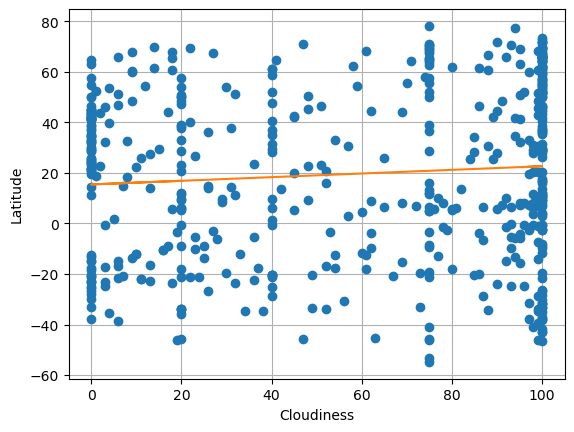

In [32]:
# Cloudiness (%) vs. Latitude
m = np.polyfit(List[3],List[1],1)
f = np.poly1d(m)
plt.plot(List[3],List[1],"o", List[3], f(List[3]))
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.grid()


plt.show()

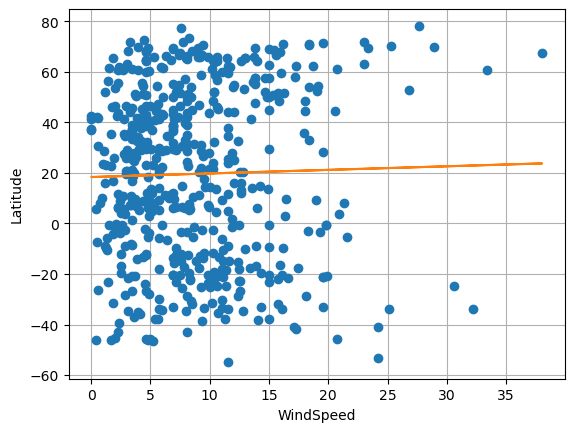

In [33]:
# WindSpeed (%) vs. Latitude
m = np.polyfit(List[4],List[1],1)
f = np.poly1d(m)
plt.plot(List[4],List[1],"o", List[4], f(List[4]))
plt.xlabel("WindSpeed")
plt.ylabel("Latitude")
plt.grid()
plt.show()

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
# Create a DataFrame
d = {"City_ID":List[6],"City":List[5],"City Country":List[8],"City date":List[9],"Lat":List[1],"Lng":List[7],'Max Temp': List[0],"Humidity":List[2],'Cloudiness':List[3],"Wind Speed":List[4]}
df = pd.DataFrame(data = d)
df

,City_ID,City,City Country,City date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,1,malayal,PH,1665498930,7.2080,121.9420,79.57,84,97,3.29
1,2,fortuna,US,1665498931,40.5982,-124.1573,52.66,88,100,4.61
2,3,sao filipe,CV,1665498931,14.8961,-24.4956,80.37,74,26,7.65
3,4,arraial do cabo,BR,1665498931,-22.9661,-42.0278,78.66,78,0,14.97
4,5,igarka,RU,1665498932,67.4667,86.5833,35.22,97,100,15.55
...,...,...,...,...,...,...,...,...,...,...
531,532,campbell river,CA,1665499076,50.0163,-125.2446,50.27,66,20,6.91
532,533,athabasca,CA,1665499076,54.7169,-113.2854,36.01,39,0,12.08
533,534,semme,FR,1665499076,46.1963,1.5007,61.21,88,100,1.77
534,535,skjervoy,NO,1665499077,70.0311,20.9714,50.00,76,14,3.98


In [35]:
# Convert it into Csv
df.to_csv("/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Whether.csv")

In [36]:
# Separate the Northern and Southern Hemisphere
Northern = df[df["Lat"]>=0]
Northern
Southern = df[df["Lat"]<0]
Southern

,City_ID,City,City Country,City date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,4,arraial do cabo,BR,1665498931,-22.9661,-42.0278,78.66,78,0,14.97
6,7,puerto ayora,EC,1665498932,-0.7393,-90.3518,68.56,86,96,5.99
10,11,rikitea,PF,1665498933,-23.1203,-134.9692,70.81,74,3,7.18
11,12,ushuaia,AR,1665498933,-54.8000,-68.3000,49.66,46,75,11.50
12,13,constitucion,CL,1665498934,-35.3333,-72.4167,59.61,61,4,10.67
...,...,...,...,...,...,...,...,...,...,...
506,507,kampene,CD,1665499070,-3.6000,26.6667,80.02,61,62,2.39
522,523,camapua,BR,1665499074,-19.5314,-54.0439,75.49,73,100,2.53
523,524,tual,ID,1665499074,-5.6667,132.7500,83.32,71,95,5.73
527,528,sydney,AU,1665499075,-33.8679,151.2073,58.30,83,20,5.75


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [37]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(Northern['Lat'],Northern["Max Temp"])
intercept

93.10607609647275

In [38]:
y = Northern['Lat']*slope+intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_equation

'y = -0.85x + 93.11'

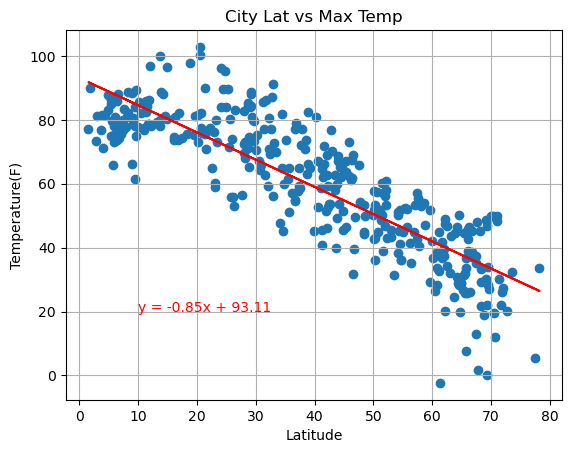

In [39]:
# Northern Hemisphere - Temperature (F) vs. Latitude
plt.scatter(Northern['Lat'],Northern["Max Temp"])
plt.plot(Northern['Lat'],y,color = 'red')
plt.grid()
plt.annotate(line_equation,(10,20),color='red')
plt.title("City Lat vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.savefig('/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Northern City Lat vs Max Temp.png')


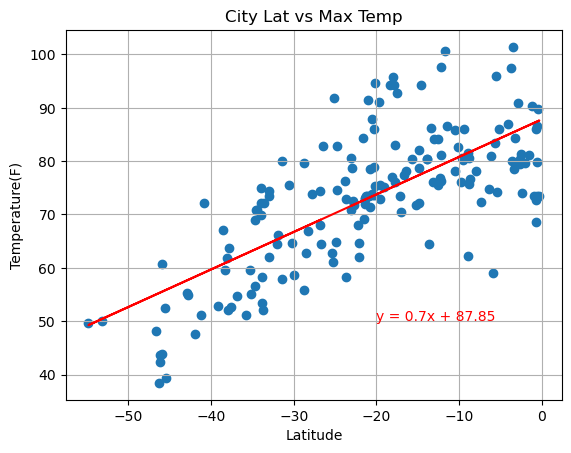

In [40]:
# Southern Hemisphere - Temperature (F) vs. Latitude
slope, intercept, rvalue, pvalue, stderr = stats.linregress(Southern['Lat'],Southern["Max Temp"])
y = Southern['Lat']*slope+intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Southern['Lat'],Southern["Max Temp"])
plt.plot(Southern['Lat'],y,color = 'red')
plt.grid()
plt.annotate(line_equation,(-20,50),color='red')
plt.title("City Lat vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.savefig('/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Southern City Lat vs Max Temp.png')

## Latitude vs. Humidity Plot

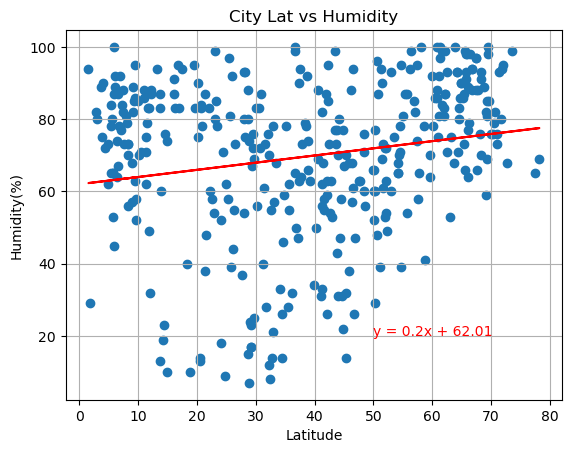

In [41]:
# Northern Hemisphere - Humidity (%) vs. Latitude
slope, intercept, rvalue, pvalue, stderr = stats.linregress(Northern['Lat'],Northern["Humidity"])
y = Northern['Lat']*slope+intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Northern['Lat'],Northern["Humidity"])
plt.plot(Northern['Lat'],y,color = 'red')
plt.grid()
plt.annotate(line_equation,(50,20),color='red')
plt.title("City Lat vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig('/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Northern City Lat vs Humidity.png')

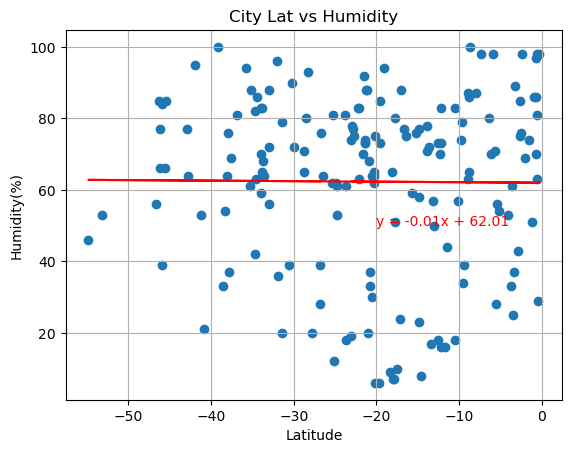

In [42]:
# Southern Hemisphere - Humidity (%) vs. Latitude
slope, intercept, rvalue, pvalue, stderr = stats.linregress(Southern['Lat'],Southern["Humidity"])
y = Southern['Lat']*slope+intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Southern['Lat'],Southern["Humidity"])
plt.plot(Southern['Lat'],y,color = 'red')
plt.grid()
plt.annotate(line_equation,(-20,50),color='red')
plt.title("City Lat vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig('/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Southern City Lat vs Humidity.png')

## Latitude vs. Cloudiness Plot

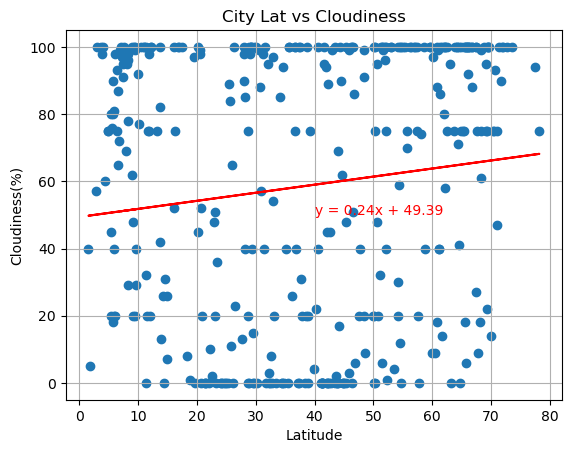

In [43]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
slope, intercept, rvalue, pvalue, stderr = stats.linregress(Northern['Lat'],Northern["Cloudiness"])
y = Northern['Lat']*slope+intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Northern['Lat'],Northern["Cloudiness"])
plt.plot(Northern['Lat'],y,color = 'red')
plt.grid()
plt.annotate(line_equation,(40,50),color='red')
plt.title("City Lat vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig('/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Northern City Lat vs Cloudiness.png')

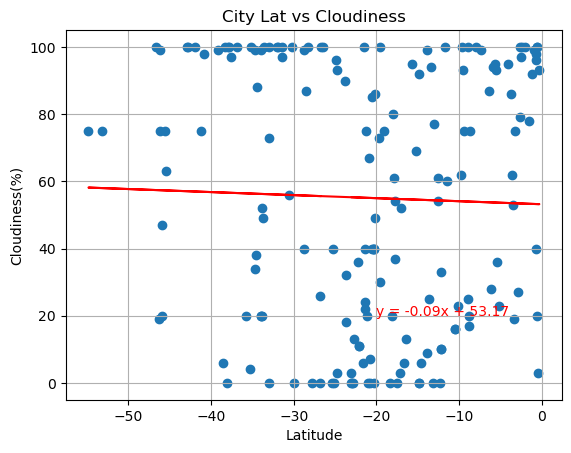

In [44]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
slope, intercept, rvalue, pvalue, stderr = stats.linregress(Southern['Lat'],Southern["Cloudiness"])
y = Southern['Lat']*slope+intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Southern['Lat'],Southern["Cloudiness"])
plt.plot(Southern['Lat'],y,color = 'red')
plt.grid()
plt.annotate(line_equation,(-20,20),color='red')
plt.title("City Lat vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig('/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Southern City Lat vs Cloudiness.png')

## Latitude vs. Wind Speed Plot

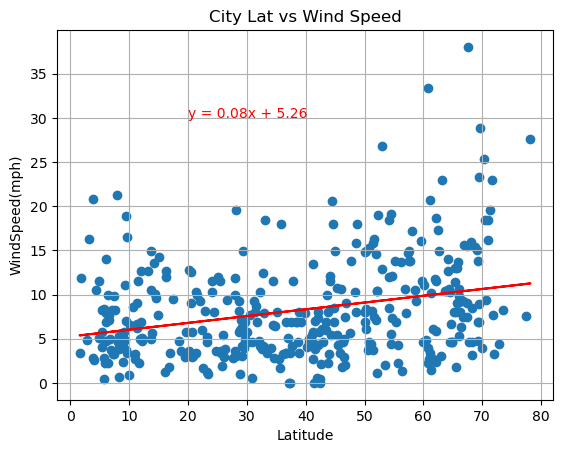

In [55]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
slope, intercept, rvalue, pvalue, stderr = stats.linregress(Northern['Lat'],Northern["Wind Speed"])
y = Northern['Lat']*slope+intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Northern['Lat'],Northern["Wind Speed"])
plt.plot(Northern['Lat'],y,color = 'red')
plt.grid()
plt.annotate(line_equation,(20,30),color='red')
plt.title("City Lat vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("WindSpeed(mph)")
plt.savefig('/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Northern City Lat vs Wind Speed(mph).png')

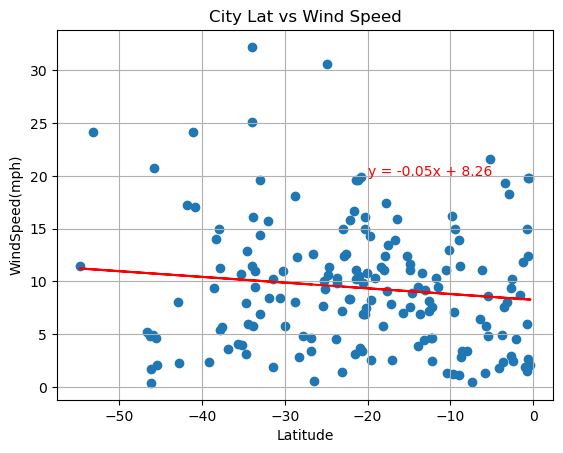

In [46]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
slope, intercept, rvalue, pvalue, stderr = stats.linregress(Southern['Lat'],Southern["Wind Speed"])
y = Southern['Lat']*slope+intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Southern['Lat'],Southern["Wind Speed"])
plt.plot(Southern['Lat'],y,color = 'red')
plt.grid()
plt.annotate(line_equation,(-20,20),color='red')
plt.title("City Lat vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("WindSpeed(mph)")
plt.savefig('/Users/siyuanliang/BootCamp_University/Python-api-challenge/WeatherPy/Southern City Lat vs Wind Speed (mph).png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [47]:
linregress(Northern['Lat'],Northern["Max Temp"])

LinregressResult(slope=-0.8519046234753196, intercept=93.10607609647275, rvalue=-0.8562641316674502, pvalue=3.506248949624493e-106, stderr=0.02697319397627326, intercept_stderr=1.1849035339469538)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [48]:
linregress(Southern['Lat'],Southern["Max Temp"])

LinregressResult(slope=0.704024122955932, intercept=87.84842631634328, rvalue=0.7177840348110086, pvalue=2.2802853681136135e-28, stderr=0.05253218485492207, intercept_stderr=1.2985257384983917)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [49]:
linregress(Northern['Lat'],Northern["Humidity"])

LinregressResult(slope=0.19857846155090192, intercept=62.005303737062086, rvalue=0.18744524537720364, pvalue=0.0003172152504307952, stderr=0.05461821652238947, intercept_stderr=2.3993197777092035)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [50]:
linregress(Southern['Lat'],Southern["Humidity"])

LinregressResult(slope=-0.01447659339153273, intercept=62.011985403335856, rvalue=-0.007723871733156942, pvalue=0.920135210932629, stderr=0.14417003904358666, intercept_stderr=3.563691609923104)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [51]:
linregress(Northern['Lat'],Northern["Cloudiness"])

LinregressResult(slope=0.24013315814720085, intercept=49.39449884334136, rvalue=0.12465901158953444, pvalue=0.017184358720790355, stderr=0.1003169240619064, intercept_stderr=4.406815075003741)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [52]:
linregress(Southern['Lat'],Southern["Cloudiness"])

LinregressResult(slope=-0.09061867299653815, intercept=53.17431067796285, rvalue=-0.0311413416263767, pvalue=0.6859648314641125, stderr=0.22373109031391547, intercept_stderr=5.530334976115252)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [53]:
linregress(Northern['Lat'],Northern["Wind Speed"])

LinregressResult(slope=0.07675124931320841, intercept=5.259960845905162, rvalue=0.2832643864169853, pvalue=3.6628686903921284e-08, stderr=0.013638849213113636, intercept_stderr=0.599140044215884)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [54]:
linregress(Southern['Lat'],Southern["Wind Speed"])

LinregressResult(slope=-0.05415620541597154, intercept=8.258338103380012, rvalue=-0.1184117819109508, pvalue=0.12294978446090842, stderr=0.0349336297844372, intercept_stderr=0.863512864342924)